In [1]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from tqdm import tqdm
import seaborn as sns

In [2]:
data = pd.read_csv('../eleanor-lite-combined-v2.txt')
with open("colnames.json", "r", encoding="utf-8") as f:
    check = f.read()
    columns = json.loads(check)
    columns = columns["column_names"]
data.columns = columns
tqdm.pandas()

data['abs_path'] = data['path'].progress_apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))
data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
data.insert(2, 'Sector', data.pop('Sector'))


100%|██████████| 12352866/12352866 [00:13<00:00, 896602.65it/s]


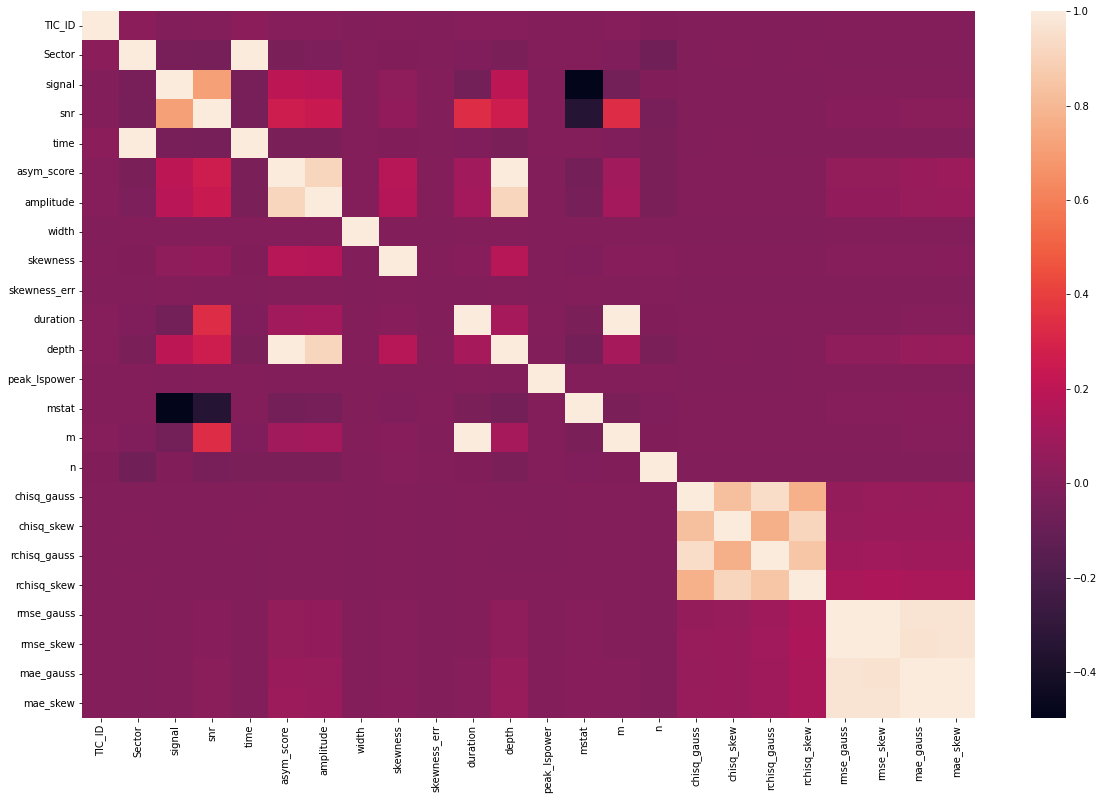

In [3]:
correlations = data.corr()
plt.figure(figsize=(20,13))
sns.heatmap(correlations)